# Business Case: Walmart - Confidence Interval and CLT

### About Walmart
* Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Business Problem:
* The Management team at Walmart Inc. wants to analyse the customer purchase behaviour (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Dataset
Dataset contains following columns
* **User_ID:** User ID
* **Product_ID:** Product ID
* **Gender:** Sex of User
* **Age:** Age in bins
* **Occupation:** Occupation(Masked)
* **City_Category:** Category of the City (A,B,C)
* **StayInCurrentCityYears:** Number of years stay in current city
* **Marital_Status:** Marital Status
* **ProductCategory:** Product Category (Masked)
* **Purchase:** Purchase Amount

### Analysing basic metrics

In [1]:
#importing different libaries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings #to ignore the warnings & make our code more representable
warnings.filterwarnings("ignore")
import scipy.stats as spy

In [2]:
#Loading of dataset
df = pd.read_csv("../scaler/walmart_data.csv")
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [3]:
df.tail()

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490

In [4]:
df.shape #to observe shape of data

(550068, 10)

Dataset is of 550068 rows and 10 attributes.

In [5]:
df.info() #to observe the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


## Memory Optimization

In [6]:
#Updating 'Marital_Status' column
df["Marital_Status"].replace({0:"Single",1:"Married",},inplace=True)
df['Marital_Status']

0          Single
1          Single
2          Single
3          Single
4          Single
           ...   
550063    Married
550064     Single
550065    Married
550066     Single
550067    Married
Name: Marital_Status, Length: 550068, dtype: object

In [7]:
df['Age'] = df['Age'].astype('category')
df['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: category
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [8]:
# Converting 'City_Category' column's datatype to category
df['City_Category'] = df['City_Category'].astype('category')
df['City_Category']

0         A
1         A
2         A
3         A
4         C
         ..
550063    B
550064    C
550065    B
550066    C
550067    B
Name: City_Category, Length: 550068, dtype: category
Categories (3, object): ['A', 'B', 'C']

In [9]:
#Converting 'Stay_In_Current_City_Years' column's datatype to category
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
df['Stay_In_Current_City_Years']

0          2
1          2
2          2
3          2
4         4+
          ..
550063     1
550064     3
550065    4+
550066     2
550067    4+
Name: Stay_In_Current_City_Years, Length: 550068, dtype: category
Categories (5, object): ['0', '1', '2', '3', '4+']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  object  
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(3), int64(4), object(3)
memory usage: 31.0+ MB


## Statistical summary

In [11]:
df.describe()  #to generate statistical summary of numerical column

User_ID     Occupation  Product_Category       Purchase
count  5.500680e+05  550068.000000     550068.000000  550068.000000
mean   1.003029e+06       8.076707          5.404270    9263.968713
std    1.727592e+03       6.522660          3.936211    5023.065394
min    1.000001e+06       0.000000          1.000000      12.000000
25%    1.001516e+06       2.000000          1.000000    5823.000000
50%    1.003077e+06       7.000000          5.000000    8047.000000
75%    1.004478e+06      14.000000          8.000000   12054.000000
max    1.006040e+06      20.000000         20.000000   23961.000000

**Conclusion:**

* User_ID: Each user assigned a unique identification number. The dataset encompasses a total of 550,068 user records, providing a substantial amount of information for analysis and study.


* Occupation: The dataset incorporates the Occupation variable, which serves as a representation of the users' occupations. Mean occupations is 8.07 with maximum as 20 and minimum as 0.


* Product_Category: This variable comprises values ranging from 1 to 20, representing a diverse range of product categories within the dataset.


* Purchase: The dataset encompasses a wide range of purchase values, spanning from 12 to 23,961, reflecting the varying monetary amounts spent by users on their purchases.

In [12]:
# description of columns with 'object' datatype
df.describe(include = 'object')

Product_ID  Gender Marital_Status
count      550068  550068         550068
unique       3631       2              2
top     P00265242       M         Single
freq         1880  414259         324731

**Conclusion:**

The provided data represents summary statistics for two variables: Product_ID and Gender. Here is a breakdown of the information:

* Product_ID: the Product_ID variable, which exhibits 3,631 unique values, indicating the presence of 3,631 distinct products. The most frequently observed value in this variable is 'P00265242', which occurs 1,880 times within the dataset. This information highlights the diversity of products and identifies the most commonly encountered product in the dataset.

* Gender: There are 2 unique values in this variable, which suggests that it represents a binary category. The top value is 'M', indicating that 'M' is the most common gender category. It appears 414,259 times in the dataset.

* Martial_status: There are 2 unique values in this variable, which suggests that it represents a binary category. The top value is 'Single' It appears 324731 times in the dataset.

In [13]:
df.isnull().sum() #missing or null values in data

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

* There are no missing values in the data.

In [14]:
# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
gender.columns = ['Gender', 'Count']
gender

Gender  Count
0      M  75.31
1      F  24.69

* 75.31% of customers are Male and 24.69% customers are Female

In [15]:
#Occupation statistics (listed in %)
Occupation = df['Occupation'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
Occupation.columns = ['Occupation', 'Count']
Occupation

Occupation  Count
0            4  13.15
1            0  12.66
2            7  10.75
3            1   8.62
4           17   7.28
5           20   6.10
6           12   5.67
7           14   4.96
8            2   4.83
9           16   4.61
10           6   3.70
11           3   3.21
12          10   2.35
13           5   2.21
14          15   2.21
15          11   2.11
16          19   1.54
17          13   1.40
18          18   1.20
19           9   1.14
20           8   0.28

* From the above result, it is clear that majority of the occupation is 4 and lowest is 8.

In [16]:
#Age statistics (listed in %)
Age = df['Age'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
Age.columns = ['Age', 'Count']
Age

Age  Count
0  26-35  39.92
1  36-45  20.00
2  18-25  18.12
3  46-50   8.31
4  51-55   7.00
5    55+   3.91
6   0-17   2.75

* It appears that the majority of individuals have a moderate age group(26-35) percentage is 39.92, while a low age group(0-17) percentage is 2.75.

In [17]:
#Stay_In_Current_City_Years statistics (listed in %)
Stay_In_Current_City_Years = df['Stay_In_Current_City_Years'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
Stay_In_Current_City_Years.columns = ['Stay_In_Current_City_Years', 'Count']
Stay_In_Current_City_Years

Stay_In_Current_City_Years  Count
0                          1  35.24
1                          2  18.51
2                          3  17.32
3                         4+  15.40
4                          0  13.53

* From the above result, it is clear that majority of the transactions 35.24 % are made by the customers having 1 years of stay in the current city.
* This observation suggests that customers with a relatively shorter duration of stay in the current city

In [18]:
#list of products, listed in percentage
productcat = df['Product_Category'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
productcat.columns = ['Product Category', 'Count']
productcat

Product Category  Count
0                  5  27.44
1                  1  25.52
2                  8  20.71
3                 11   4.42
4                  2   4.34
5                  6   3.72
6                  3   3.67
7                  4   2.14
8                 16   1.79
9                 15   1.14
10                13   1.01
11                10   0.93
12                12   0.72
13                 7   0.68
14                18   0.57
15                20   0.46
16                19   0.29
17                14   0.28
18                17   0.11
19                 9   0.07

* The results indicate that Product Category 5 has the highest count, representing 27.44% of the total and Product Categories 9 has the lowest counts with 0.07.

# Non-Graphical Analysis¶

In [19]:
# Total no. of unique userId
df['User_ID'].nunique()

5891

In [20]:
genderc = df['Gender'].value_counts().reset_index()
genderc.columns = ['Gender', 'Count']
genderc

Gender   Count
0      M  414259
1      F  135809

In [21]:
Productc= df['Product_Category'].value_counts().reset_index()
Productc.columns = ['Product_Category', 'Count']
Productc

Product_Category   Count
0                  5  150933
1                  1  140378
2                  8  113925
3                 11   24287
4                  2   23864
5                  6   20466
6                  3   20213
7                  4   11753
8                 16    9828
9                 15    6290
10                13    5549
11                10    5125
12                12    3947
13                 7    3721
14                18    3125
15                20    2550
16                19    1603
17                14    1523
18                17     578
19                 9     410

In [22]:
Agec= df['Age'].value_counts().reset_index()
Agec.columns = ['Age', 'Count']
Agec

Age   Count
0  26-35  219587
1  36-45  110013
2  18-25   99660
3  46-50   45701
4  51-55   38501
5    55+   21504
6   0-17   15102

In [23]:
df.describe()[['User_ID','Occupation','Product_Category', 'Purchase']].loc[['min', 'max']]

User_ID  Occupation  Product_Category  Purchase
min  1000001.0         0.0               1.0      12.0
max  1006040.0        20.0              20.0   23961.0

# Univariate Analysis

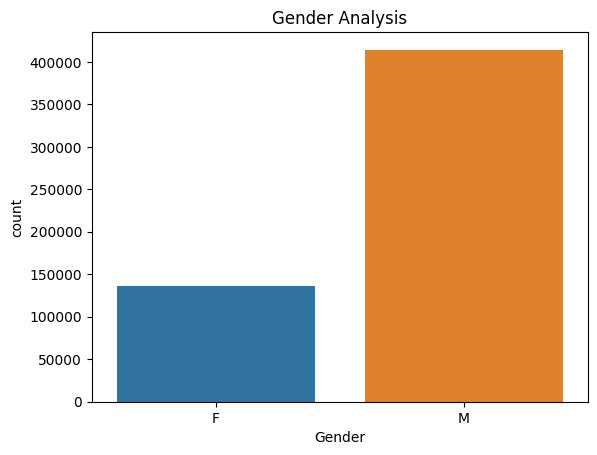

In [24]:
#Gender Analysis
sns.countplot(data=df,x='Gender')
plt.title("Gender Analysis")
plt.show()

* Majority of the users are Male

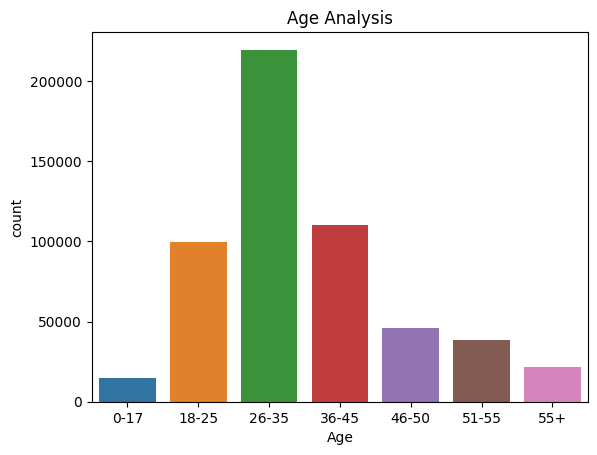

In [25]:
#Age Analysis
sns.countplot(data=df,x='Age')
plt.title("Age Analysis")
plt.show()

* The age group of 26-35 encompasses a significant number of customers. Specifically, more than 200,000 customers fall within this age range. 

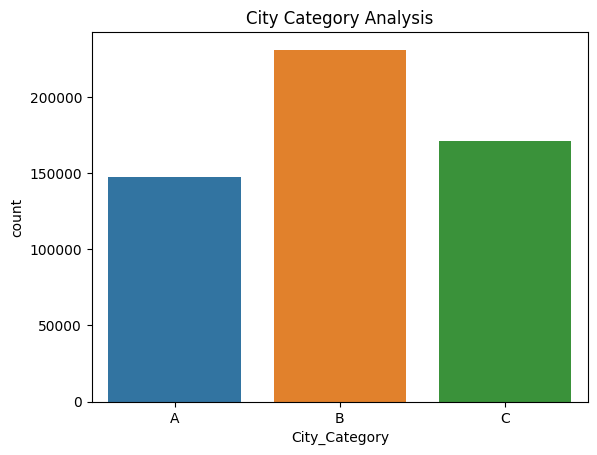

In [26]:
#City_Category Analysis
sns.countplot(data=df,x='City_Category')
plt.title("City Category Analysis")
plt.show()

* Majority of users belong to B City_Category

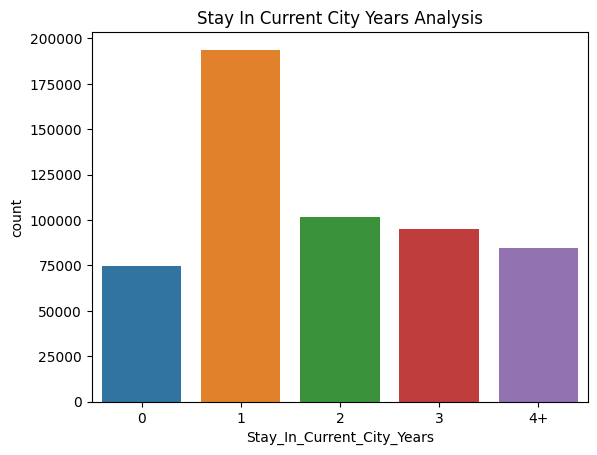

In [27]:
#Stay_In_Current_City_Years Analysis
sns.countplot(data=df,x='Stay_In_Current_City_Years')
plt.title("Stay In Current City Years Analysis")
plt.show()

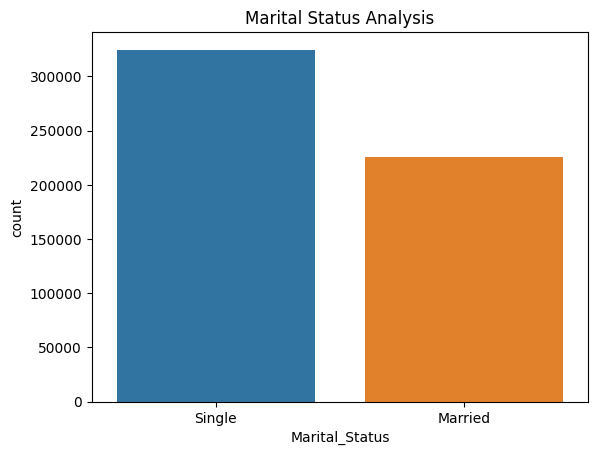

In [28]:
#Marital_Status Analysis
sns.countplot(data=df,x='Marital_Status')
plt.title("Marital Status Analysis")
plt.show()

* Majority users are Single as compare to Married

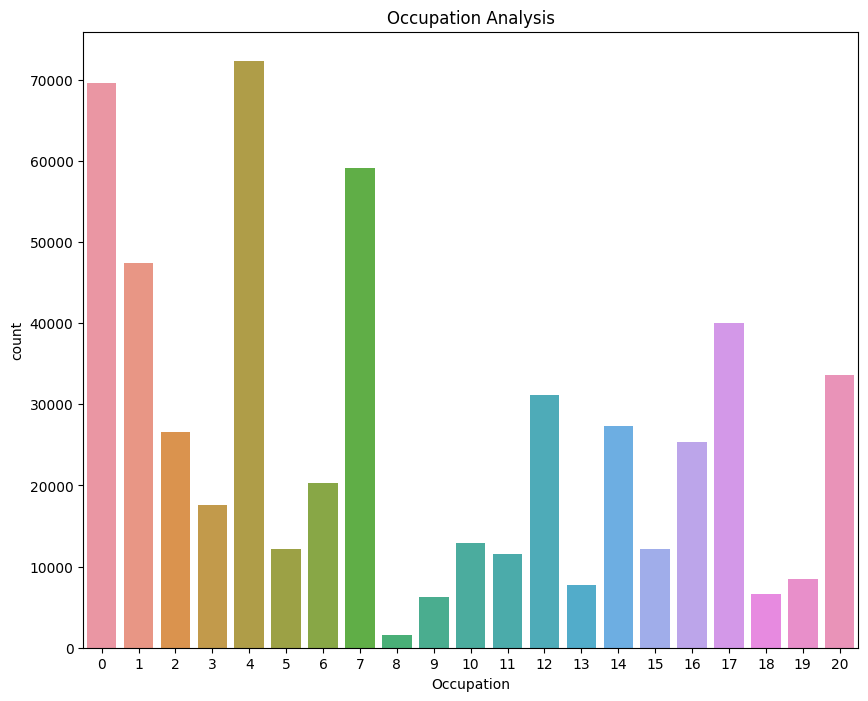

In [29]:
#Occupation Analysis
plt.figure(figsize=(10, 8))
sns.countplot(data=df,x='Occupation')
plt.title("Occupation Analysis")
plt.show()

* There are 20 different types of Occupation

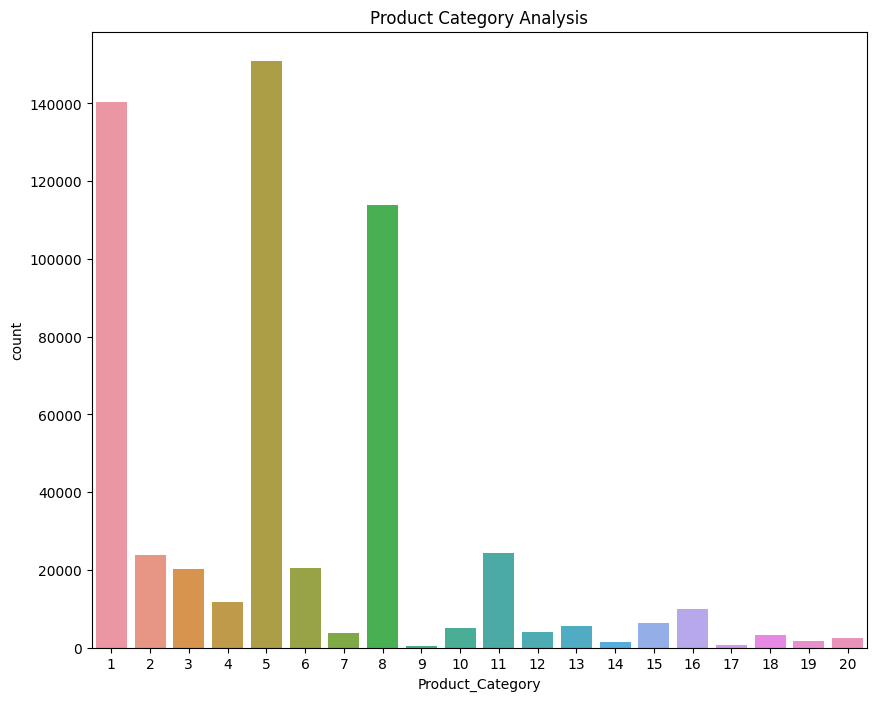

In [30]:
#Product_Category Analysis
plt.figure(figsize=(10, 8))
sns.countplot(data=df,x='Product_Category')
plt.title("Product Category Analysis")
plt.show()

* There are 20 different types of Product_Category
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

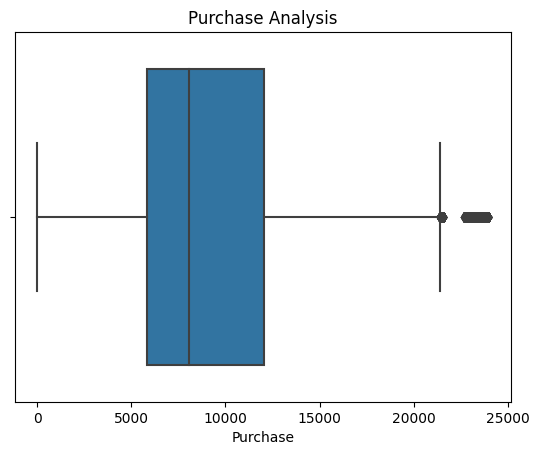

In [31]:
#Purchase analysis using Boxplot
sns.boxplot(data=df, x='Purchase')
plt.title("Purchase Analysis")
plt.show()

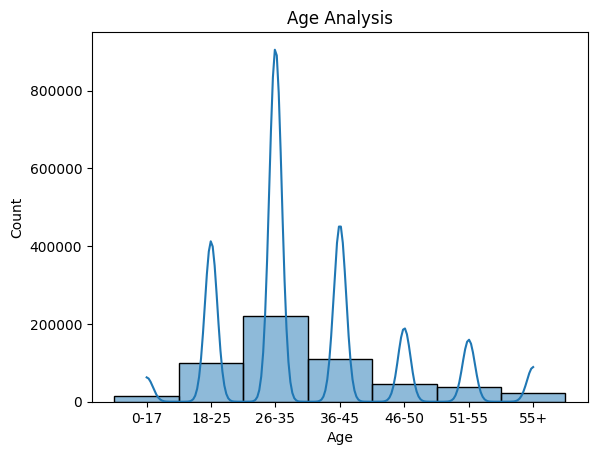

In [32]:
# age Analysis 
sns.histplot(data=df,x='Age',kde=True)
plt.title("Age Analysis")
plt.show()

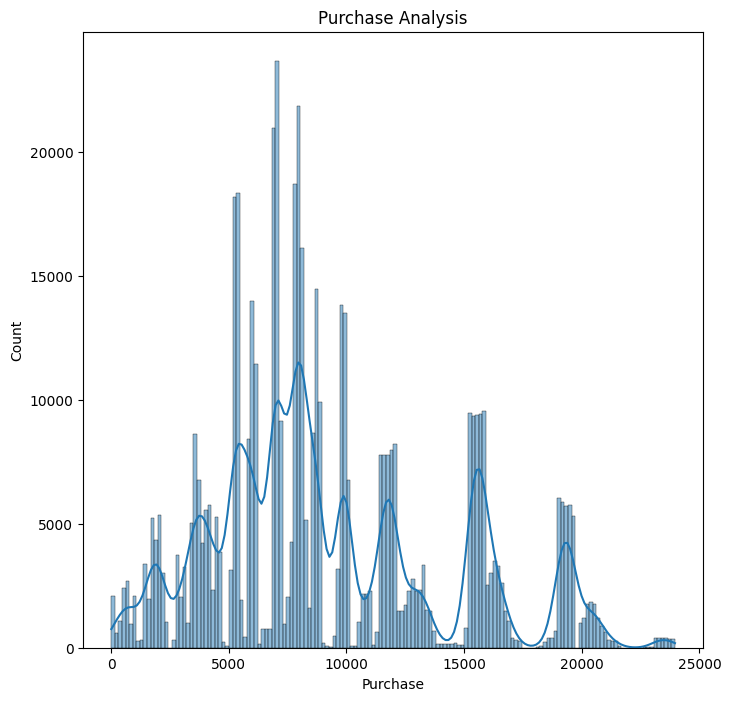

In [33]:
#Purchase analysis using histplot with kde
plt.figure(figsize=(8,8))
sns.histplot(data=df, x='Purchase', kde=True)
plt.title("Purchase Analysis")
plt.show()

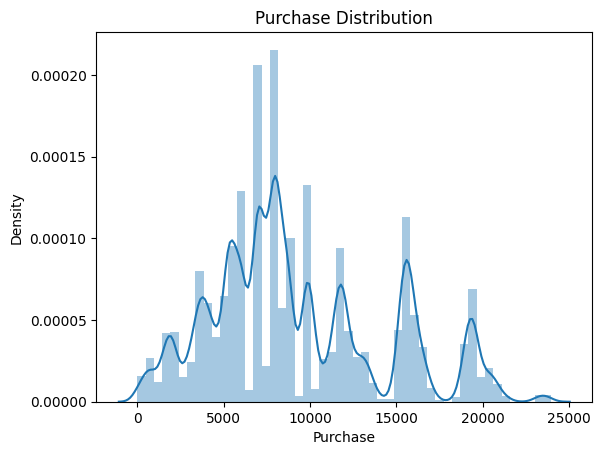

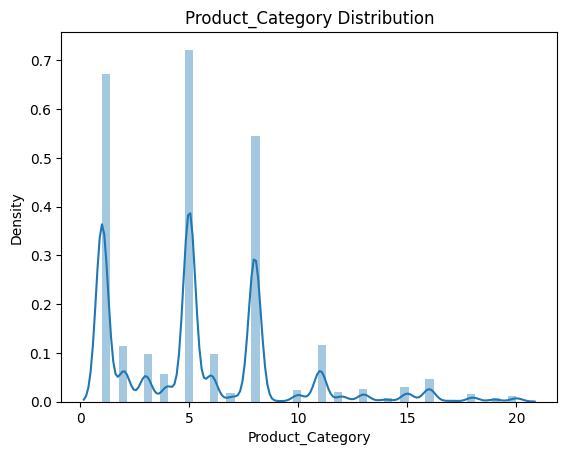

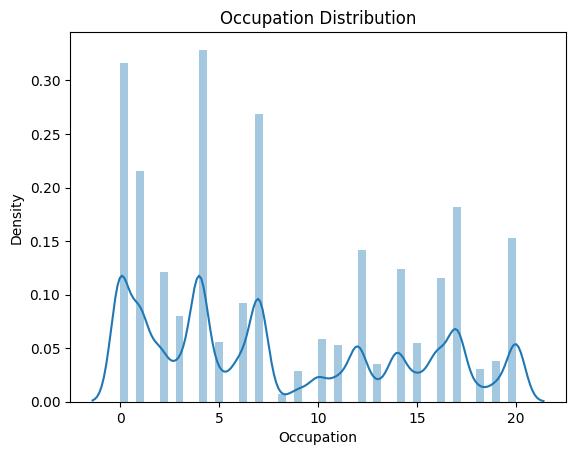

In [34]:
#Age,Purchase,Product_Category and Occupation Distribution using distplot
for col in [ 'Purchase', 'Product_Category','Occupation']:  
    sns.distplot(df[col])
    plt.title(f'{col} Distribution')
    plt.show()

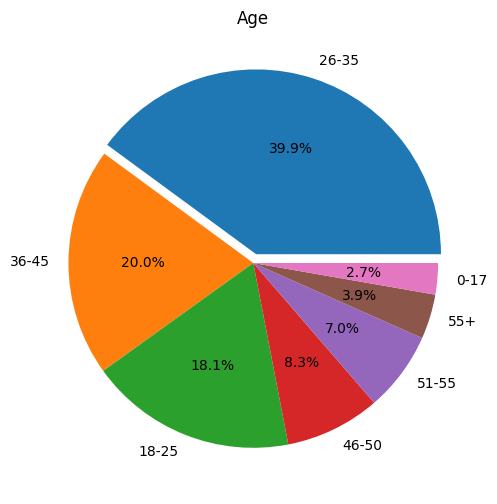

In [35]:
#Age analysis using pie chart
plt.figure(figsize = (6, 6))
data = df['Age'].value_counts(normalize=True)*100
plt.pie(x=data.values, labels=data.index,explode = [0.05] + [0] * 6, autopct = '%1.1f%%')
plt.title('Age')
plt.show()

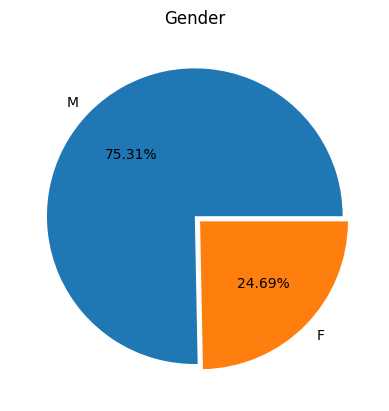

In [36]:
#Gender analysis using pie chart
data = np.round(df['Gender'].value_counts(normalize = True) * 100, 2)
plt.pie(x = data.values, labels = data.index, explode = [0, 0.05], autopct = '%.2f%%')
plt.title('Gender')
plt.show()

* Most of the users are Male

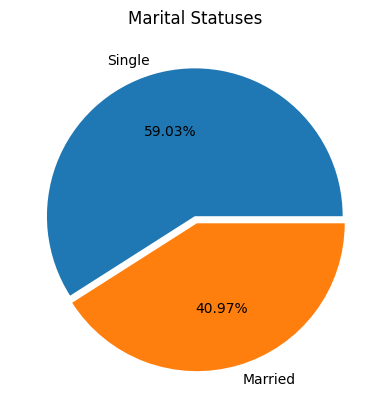

In [37]:
#Marital analysis using pie chart
data = np.round(df['Marital_Status'].value_counts(normalize = True) * 100, 2)
plt.pie(x = data.values, labels = data.index, explode = [0, 0.05], autopct = '%.2f%%')
plt.title('Marital Statuses')
plt.show()

* Majority users are Single as compare to Married

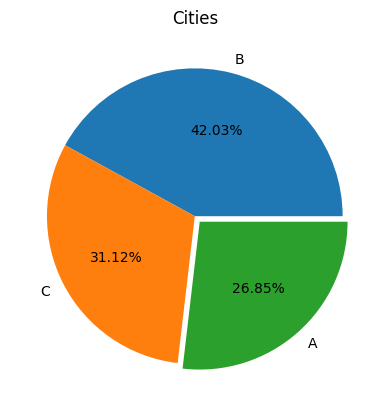

In [38]:
#City category analysis using pie chart
data = np.round(df['City_Category'].value_counts(normalize = True) * 100, 2)
plt.pie(x = data.values, labels = data.index, explode = [0, 0, 0.05], autopct = '%.2f%%')
plt.title("Cities")
plt.show()

* Majority users belong to B City_Category

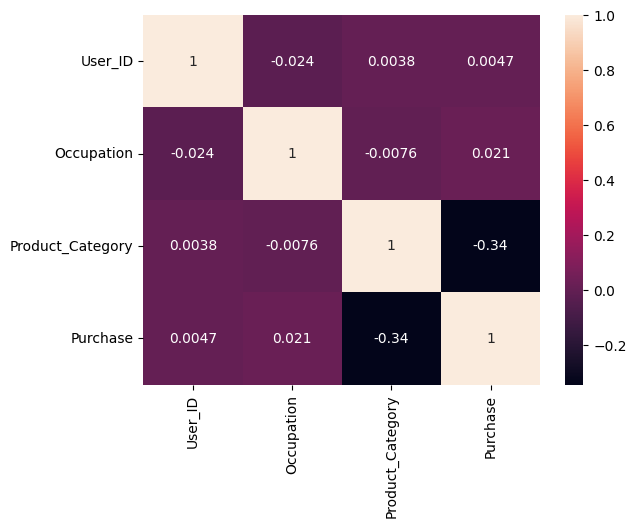

In [39]:
sns.heatmap(df.corr(), annot=True)
plt.show()

* We can conclude from Heatmap that Purchase and User_Id is correlated hence we can recommend same product to customer in Product_Category and vice versa. Similar way user_Id and Purchase.

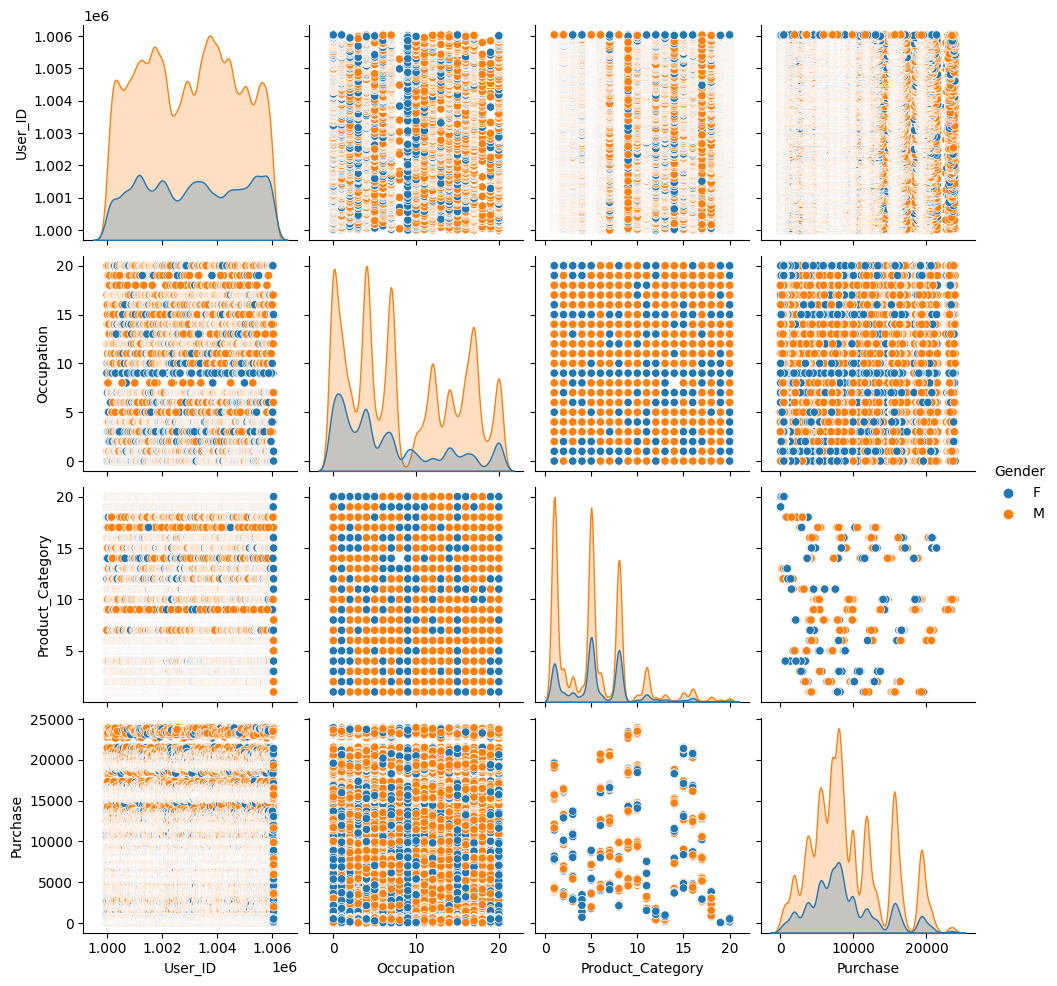

In [40]:
sns.pairplot(df, hue ='Gender')
plt.show()

* The pairplot displayed above showcases correlations between Gender and different attributes, and the findings align closely with our previous observations.

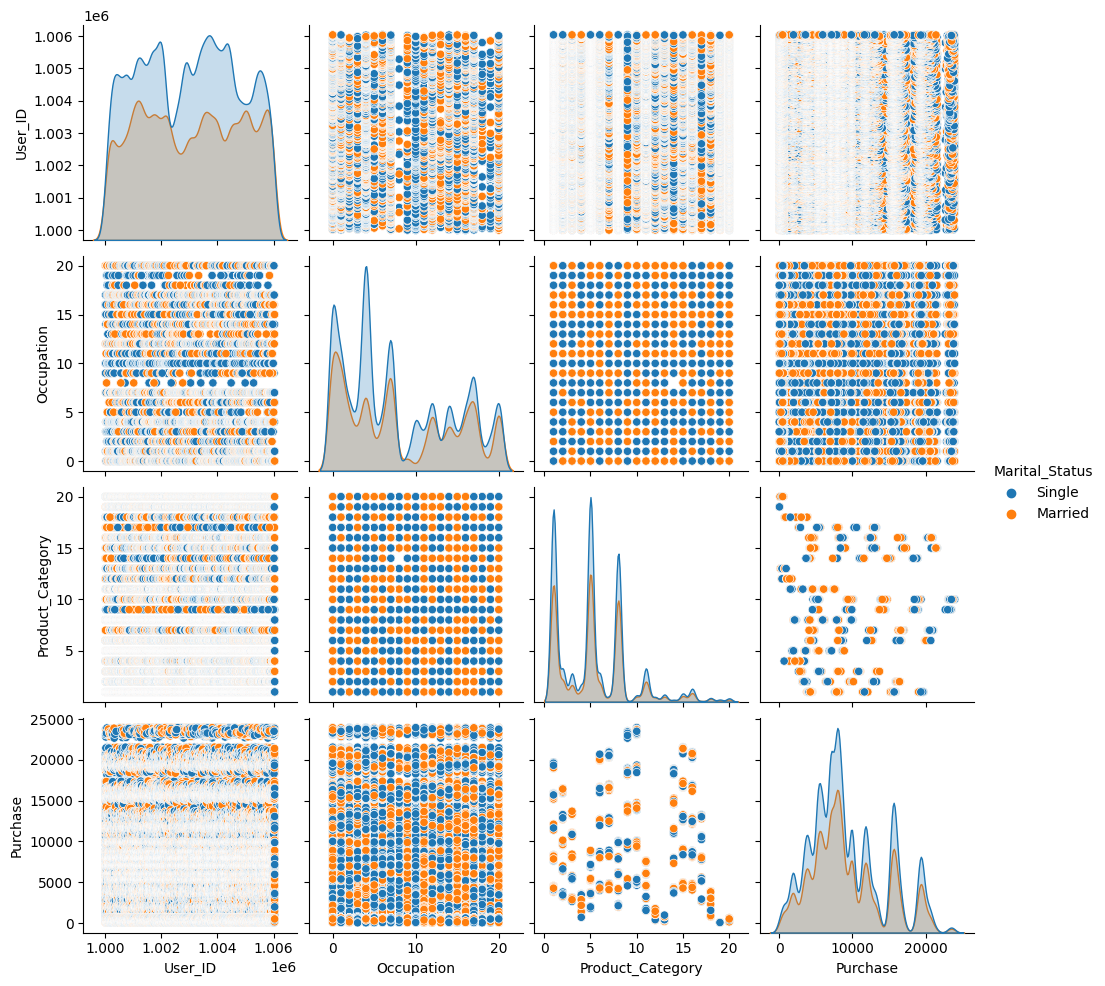

In [41]:
sns.pairplot(df, hue ='Marital_Status')
plt.show()

* The pairplot displayed above showcases correlations between Marital_status and different attributes, and the findings align closely with our previous observations.

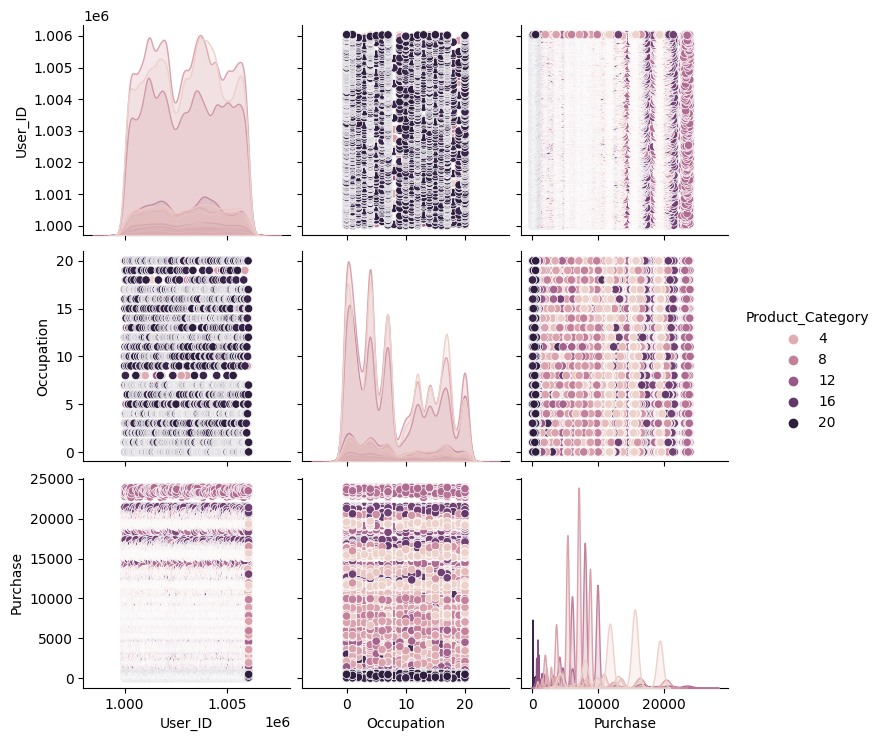

In [42]:
sns.pairplot(df, hue ='Product_Category')
plt.show()

* The pairplot displayed above showcases correlations between Product_category and different attributes, and the findings align closely with our previous observations.

# Bivariate Analysis

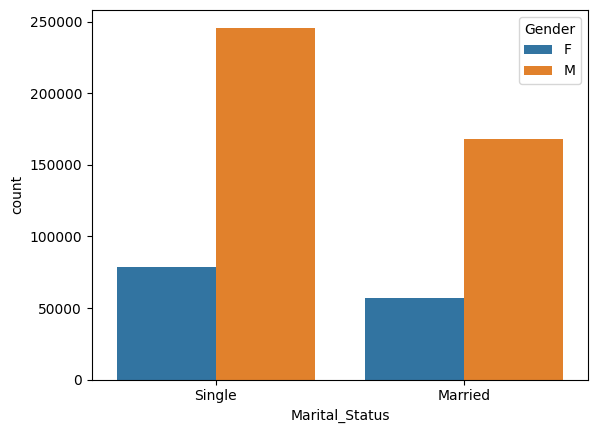

In [43]:
sns.countplot(data=df,x='Marital_Status',hue='Gender')
plt.show()

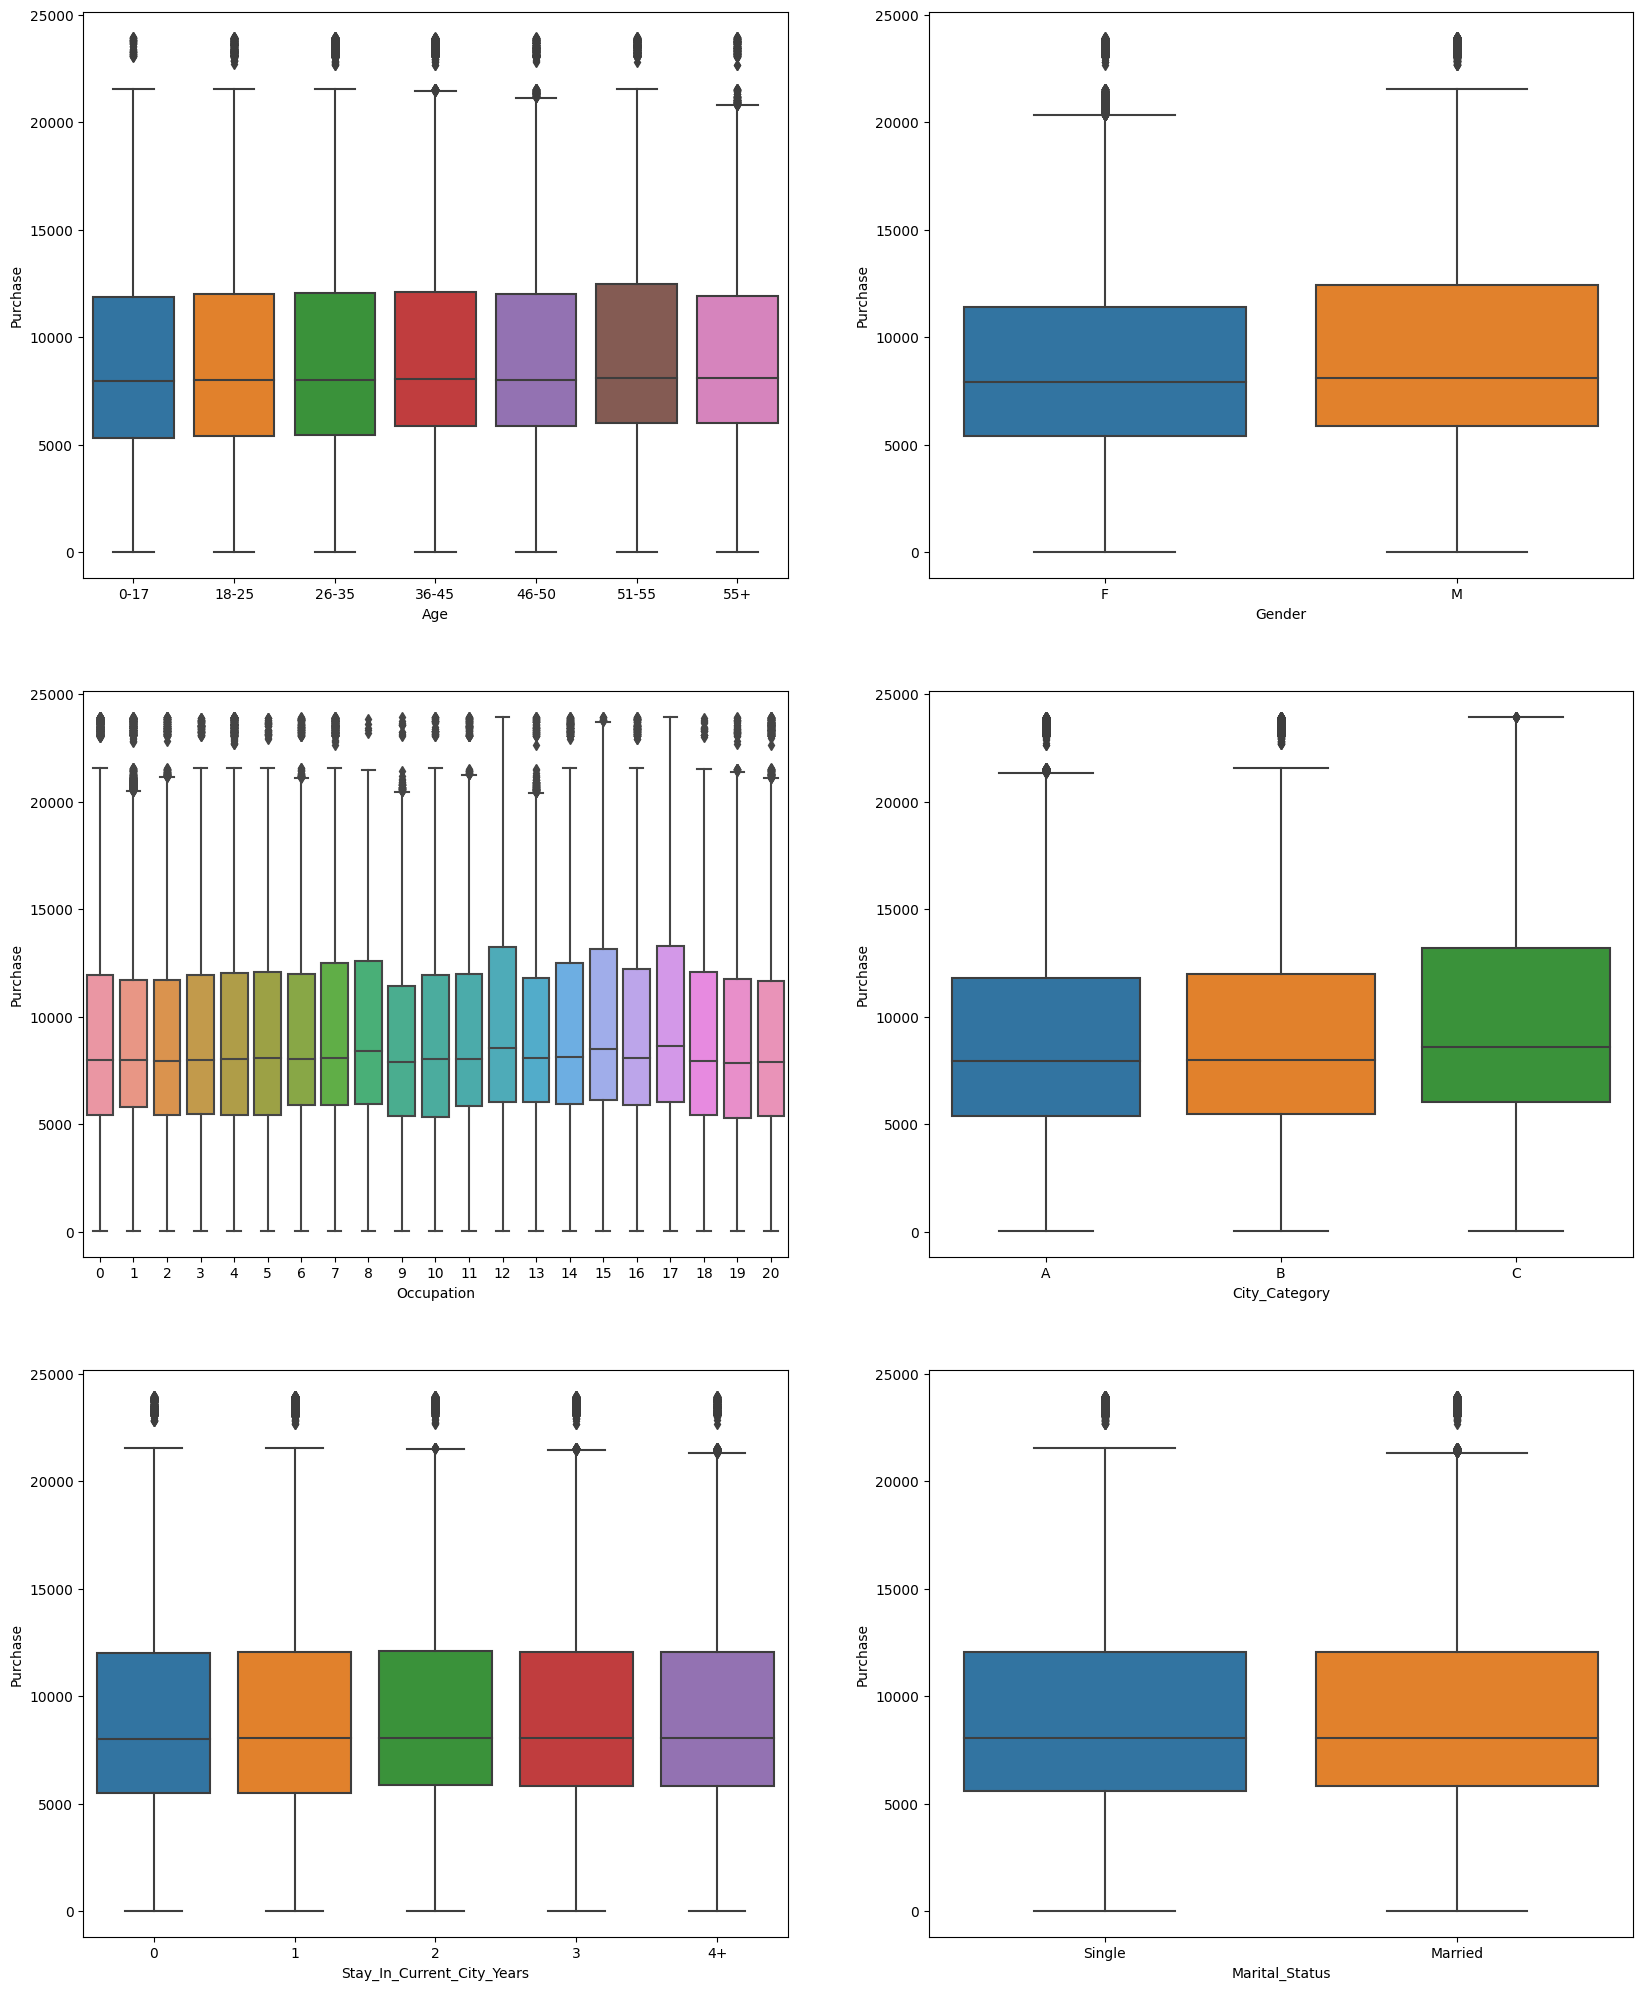

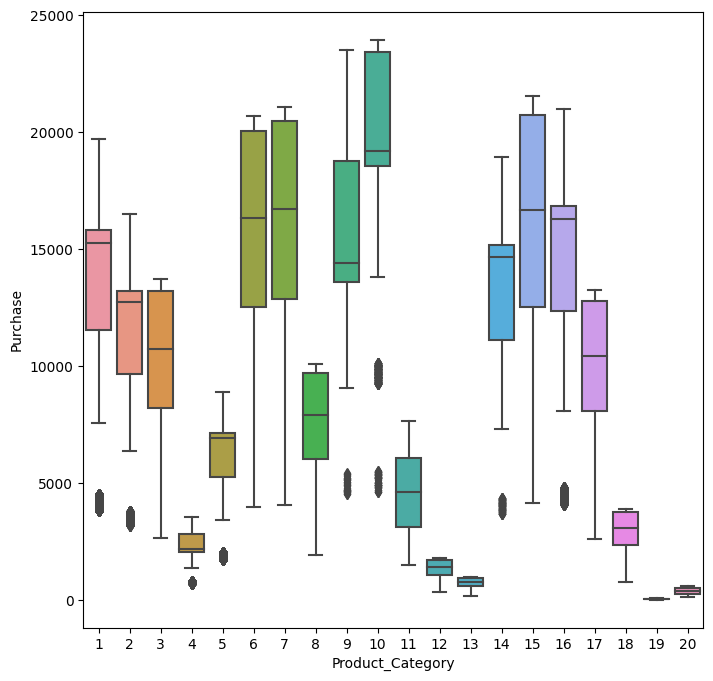

In [44]:
plt.figure(figsize=(20,25))
plt.subplot(3, 2, 1)
sns.boxplot(data=df,x='Age', y='Purchase')

plt.subplot(3, 2, 2)
sns.boxplot(data=df,x='Gender', y='Purchase')

plt.subplot(3, 2, 3)
sns.boxplot(data=df,x='Occupation', y='Purchase')

plt.subplot(3, 2, 4)
sns.boxplot(data=df,x='City_Category', y='Purchase')

plt.subplot(3, 2, 5)
sns.boxplot(data=df,x='Stay_In_Current_City_Years', y='Purchase')

plt.subplot(3, 2, 6)
sns.boxplot(data=df,x='Marital_Status', y='Purchase')

plt.show()

plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x='Product_Category', y='Purchase')
plt.show()

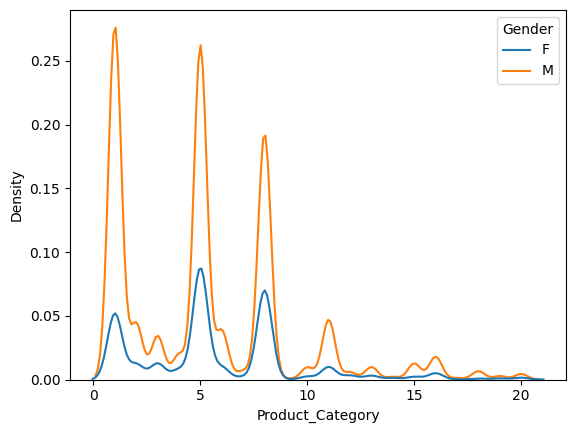

In [45]:
sns.kdeplot(data=df,x='Product_Category',hue='Gender')
plt.show()

*  product_category 0 represent the largest segment of the gender.

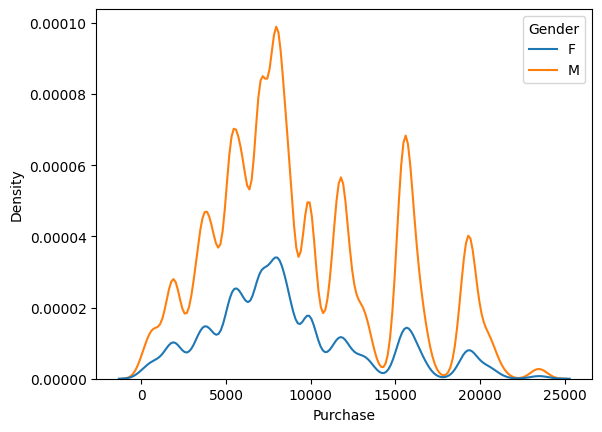

In [46]:
sns.kdeplot(data=df,x='Purchase',hue='Gender')
plt.show()

* Male customers Purchase is higher than Female customers

# Multivariate Analysis

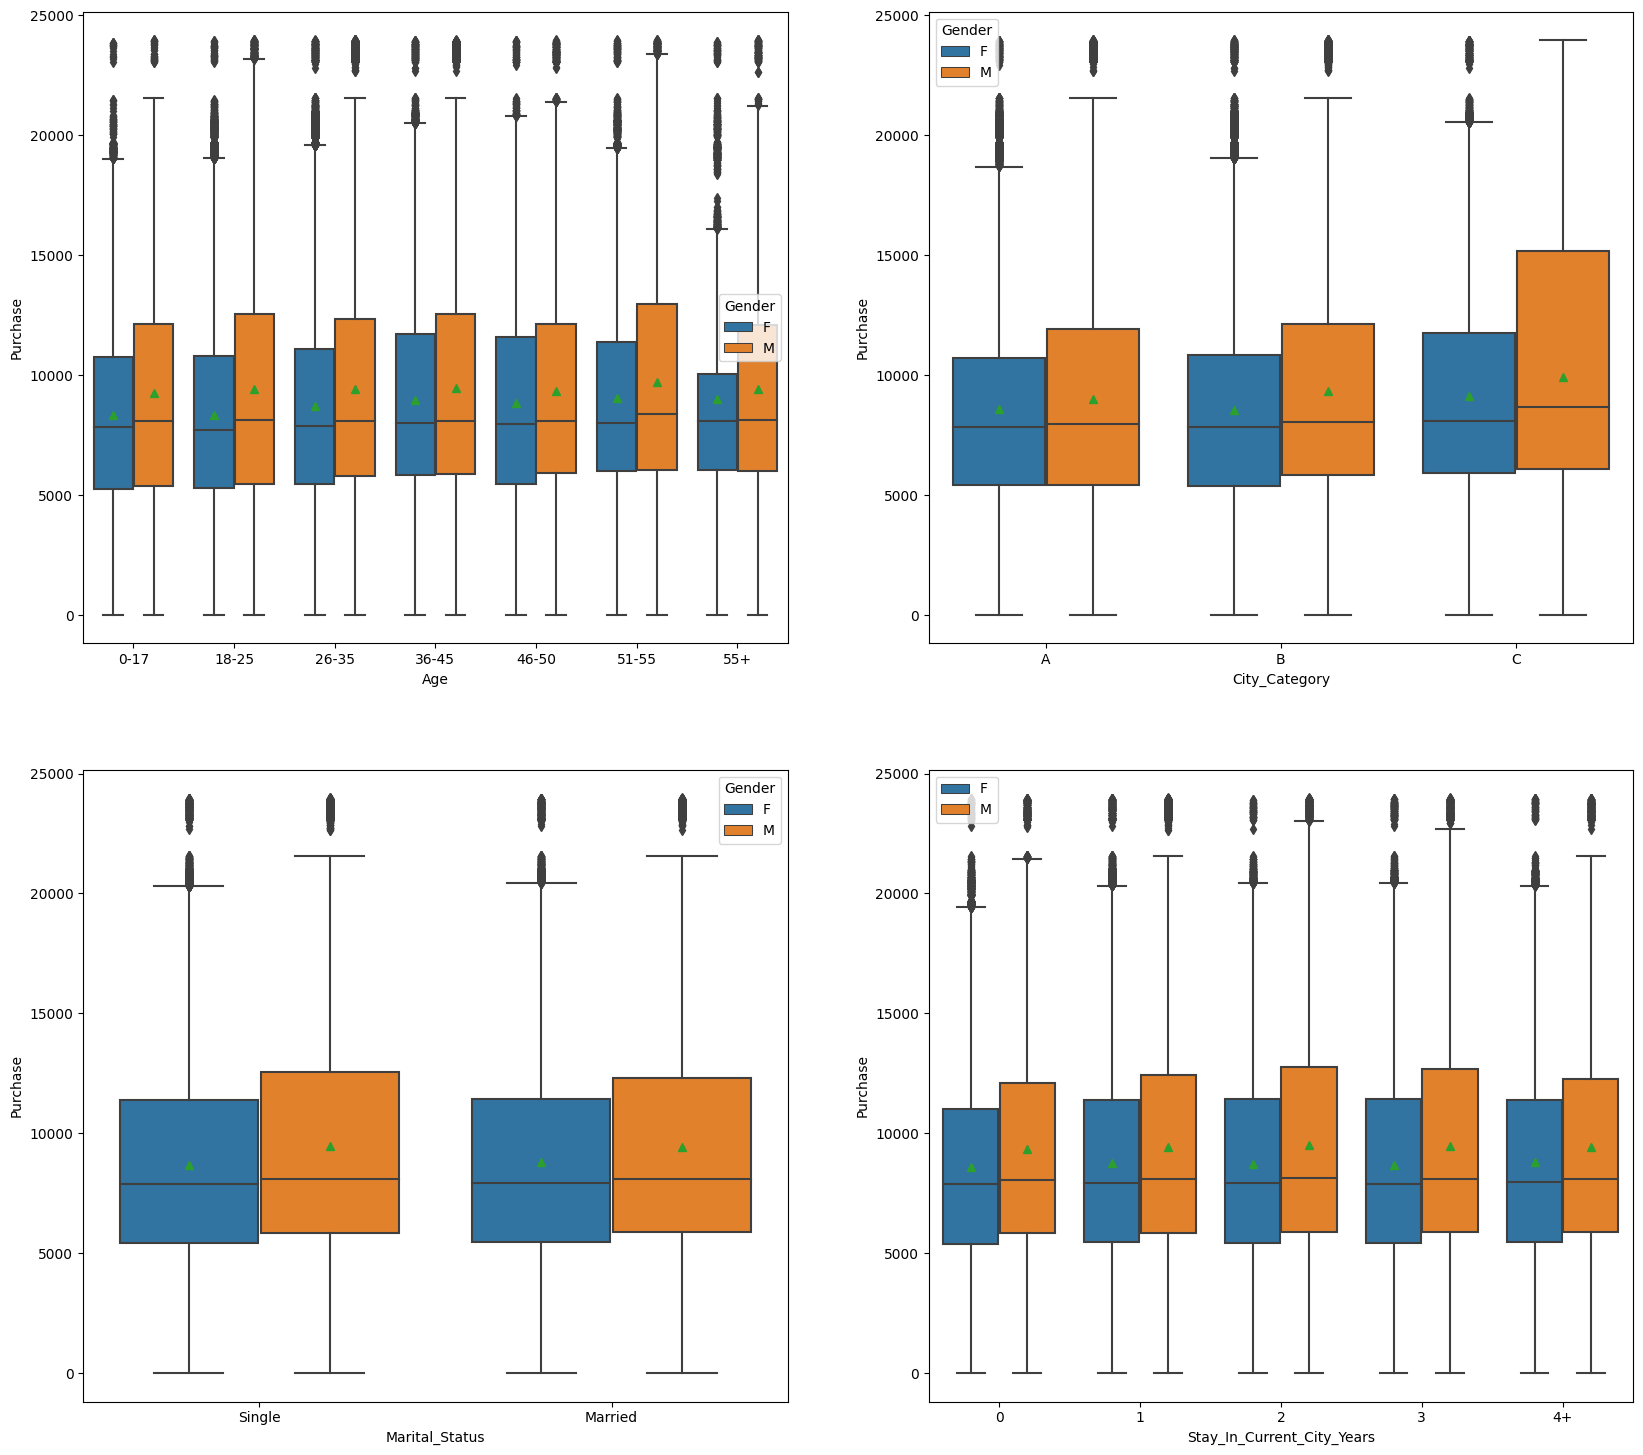

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Age', hue='Gender', ax=axs[0,0],showmeans = True)
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Gender', ax=axs[0,1],showmeans = True)

sns.boxplot(data=df, y='Purchase', x='Marital_Status', hue='Gender',  ax=axs[1,0],showmeans = True)
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', hue='Gender', ax=axs[1,1],showmeans = True)
axs[1,1].legend(loc='upper left')

plt.show()

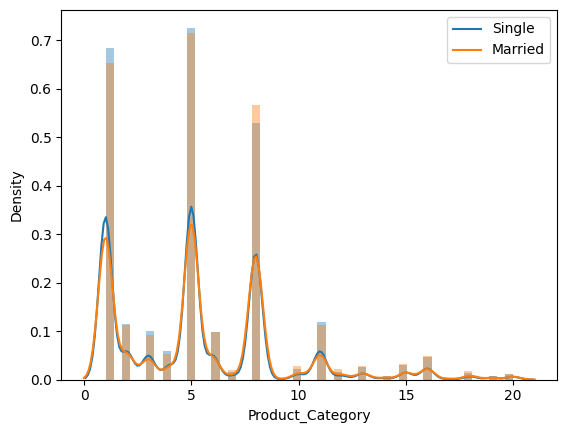

In [48]:
single = df[df['Marital_Status']=='Single']
married = df[df['Marital_Status']=='Married']
sns.distplot(x=single['Product_Category'])
sns.distplot(x=married['Product_Category'])
plt.legend(['Single', 'Married'])
plt.xlabel('Product_Category')
plt.show()

In [49]:
genderuser = pd.DataFrame(df.groupby(by = ['Gender'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
genderuser['percent_share'] = np.round(genderuser['unique_customers'] / genderuser['unique_customers'].sum() * 100, 2)
genderuser

Gender  unique_customers  percent_share
0      F              1666          28.28
1      M              4225          71.72

In [50]:
# Transactions are made by each gender category
df.groupby(by = ['Gender'])['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

In [51]:
print('Average number of transactions made by each Male on Black Friday is', round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday is', round(135809 / 1666))

Average number of transactions made by each Male on Black Friday is 98
Average number of transactions made by each Female on Black Friday is 82


In [52]:
# Total Revenue generated by Walmart from each Gender
genderpur = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
genderpur['percent_share'] = np.round((genderpur['Purchase'] / genderpur['Purchase'].sum()) * 100, 2)
genderpur

Gender    Purchase  percent_share
0      M  3909580100          76.72
1      F  1186232642          23.28

In [53]:
df1 = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Gender')['Average_Purchase'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Average_Purchase, dtype: float64

In [54]:
# Average Revenue generated by Walmart from each Gender per transaction
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})

Gender  Average_Purchase
0      F       8734.565765
1      M       9437.526040

In [55]:
maritaluser = pd.DataFrame(df.groupby(by = ['Marital_Status'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
maritaluser['percent_share'] = np.round(maritaluser['unique_customers'] / maritaluser['unique_customers'].sum() * 100, 2)
maritaluser

Marital_Status  unique_customers  percent_share
0        Married              2474           42.0
1         Single              3417           58.0

In [56]:
# Transactions are made by each Marital Status category
df.groupby(by = ['Marital_Status'])['User_ID'].count()

Marital_Status
Married    225337
Single     324731
Name: User_ID, dtype: int64

In [57]:
print('Average number of transactions made by each user with marital status Married is', round(225337 / 2474))
print('Average number of transactions made by each with marital status Single is', round(324731 / 3417))

Average number of transactions made by each user with marital status Married is 91
Average number of transactions made by each with marital status Single is 95


In [58]:
df_marital_status_revenue = df.groupby(by = ['Marital_Status'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_marital_status_revenue['percent_share'] = np.round((df_marital_status_revenue['Purchase'] / df_marital_status_revenue['Purchase'].sum()) * 100, 2)
df_marital_status_revenue

Marital_Status    Purchase  percent_share
0         Single  3008927447          59.05
1        Married  2086885295          40.95

In [59]:
# Average total purchase made by each user in each marital status
df1 = pd.DataFrame(df.groupby(by = ['Marital_Status', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})
df1.groupby(by = 'Marital_Status')['Average_Purchase'].mean()

Marital_Status
Married    843526.796686
Single     880575.781972
Name: Average_Purchase, dtype: float64

In [60]:
df_age_dist = pd.DataFrame(df.groupby(by = ['Age'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
df_age_dist['percent_share'] =  np.round(df_age_dist['unique_customers'] / df_age_dist['unique_customers'].sum() * 100, 2)
df_age_dist['cumulative_percent'] =  df_age_dist['percent_share'].cumsum()
df_age_dist

Age  unique_customers  percent_share  cumulative_percent
2  26-35              2053          34.85               34.85
3  36-45              1167          19.81               54.66
1  18-25              1069          18.15               72.81
4  46-50               531           9.01               81.82
5  51-55               481           8.16               89.98
6    55+               372           6.31               96.29
0   0-17               218           3.70               99.99

In [61]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [62]:
# Total revenue generated from each age category
df_age_revenue = pd.DataFrame(df.groupby(by = 'Age', as_index = False)['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False)
df_age_revenue['percent_share'] = np.round((df_age_revenue['Purchase'] / df_age_revenue['Purchase'].sum()) * 100, 2)
df_age_revenue['cumulative_percent_share'] = df_age_revenue['percent_share'].cumsum()
df_age_revenue

Age    Purchase  percent_share  cumulative_percent_share
2  26-35  2031770578          39.87                     39.87
3  36-45  1026569884          20.15                     60.02
1  18-25   913848675          17.93                     77.95
4  46-50   420843403           8.26                     86.21
5  51-55   367099644           7.20                     93.41
6    55+   200767375           3.94                     97.35
0   0-17   134913183           2.65                    100.00

In [63]:
df_city_dist = pd.DataFrame(df.groupby(by = ['City_Category'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_city_dist['percent_share'] = np.round((df_city_dist['unique_customers'] / df_city_dist['unique_customers'].sum()) * 100, 2)
df_city_dist['cumulative_percent_share'] = df_city_dist['percent_share'].cumsum()
df_city_dist

City_Category  unique_customers  percent_share  cumulative_percent_share
0             A              1045          17.74                     17.74
1             B              1707          28.98                     46.72
2             C              3139          53.28                    100.00

In [64]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [65]:
# Revenue generated from different cities
df_city_revenue = df.groupby(by = ['City_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_city_revenue['percent_share'] = np.round((df_city_revenue['Purchase'] / df_city_revenue['Purchase'].sum()) * 100, 2)
df_city_revenue['cumulative_percent_share'] = df_city_revenue['percent_share'].cumsum()
df_city_revenue

City_Category    Purchase  percent_share  cumulative_percent_share
0             B  2115533605          41.52                     41.52
1             C  1663807476          32.65                     74.17
2             A  1316471661          25.83                    100.00

In [66]:
df.groupby(by = ['Product_Category'])['Product_ID'].nunique()

Product_Category
1      493
2      152
3       90
4       88
5      967
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
19       2
20       3
Name: Product_ID, dtype: int64

In [67]:
# Revenue generated from different Product category
df_product_revenue = df.groupby(by = ['Product_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_product_revenue['percent_share'] = np.round((df_product_revenue['Purchase'] / df_product_revenue['Purchase'].sum()) * 100, 2)
df_product_revenue['cumulative_percent_share'] = df_product_revenue['percent_share'].cumsum()
df_product_revenue

Product_Category    Purchase  percent_share  cumulative_percent_share
0                  1  1910013754          37.48                     37.48
1                  5   941835229          18.48                     55.96
2                  8   854318799          16.77                     72.73
3                  6   324150302           6.36                     79.09
4                  2   268516186           5.27                     84.36
5                  3   204084713           4.00                     88.36
6                 16   145120612           2.85                     91.21
7                 11   113791115           2.23                     93.44
8                 10   100837301           1.98                     95.42
9                 15    92969042           1.82                     97.24
10                 7    60896731           1.20                     98.44
11                 4    27380488           0.54                     98.98
12                14    20014696           0.39                     99.37
13                18     9290201           0.18                     99.55
14                 9     6370324           0.13                     99.68
15                17     5878699           0.12                     99.80
16                12     5331844           0.10                     99.90
17                13     4008601           0.08                     99.98
18                20      944727           0.02                    100.00
19                19       59378           0.00                    100.00

In [68]:
top5 = df_product_revenue.head(5)['Purchase'].sum() /  df_product_revenue['Purchase'].sum()
top5 = np.round(top5 * 100, 2)
print(f'Top 5 product categories from which Walmart makes {top5} % of total revenue are : {list(df_product_revenue["Product_Category"].head())}')

Top 5 product categories from which Walmart makes 84.36 % of total revenue are : [1, 5, 8, 6, 2]


In [69]:
product_pur = df.groupby(by = ['Product_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
product_pur['percent_share'] = np.round((product_pur['Purchase'] / product_pur['Purchase'].sum()) * 100, 2)
product_pur['cumulative_percent_share'] = product_pur['percent_share'].cumsum()
product_pur

Product_Category    Purchase  percent_share  cumulative_percent_share
0                  1  1910013754          37.48                     37.48
1                  5   941835229          18.48                     55.96
2                  8   854318799          16.77                     72.73
3                  6   324150302           6.36                     79.09
4                  2   268516186           5.27                     84.36
5                  3   204084713           4.00                     88.36
6                 16   145120612           2.85                     91.21
7                 11   113791115           2.23                     93.44
8                 10   100837301           1.98                     95.42
9                 15    92969042           1.82                     97.24
10                 7    60896731           1.20                     98.44
11                 4    27380488           0.54                     98.98
12                14    20014696           0.39                     99.37
13                18     9290201           0.18                     99.55
14                 9     6370324           0.13                     99.68
15                17     5878699           0.12                     99.80
16                12     5331844           0.10                     99.90
17                13     4008601           0.08                     99.98
18                20      944727           0.02                    100.00
19                19       59378           0.00                    100.00

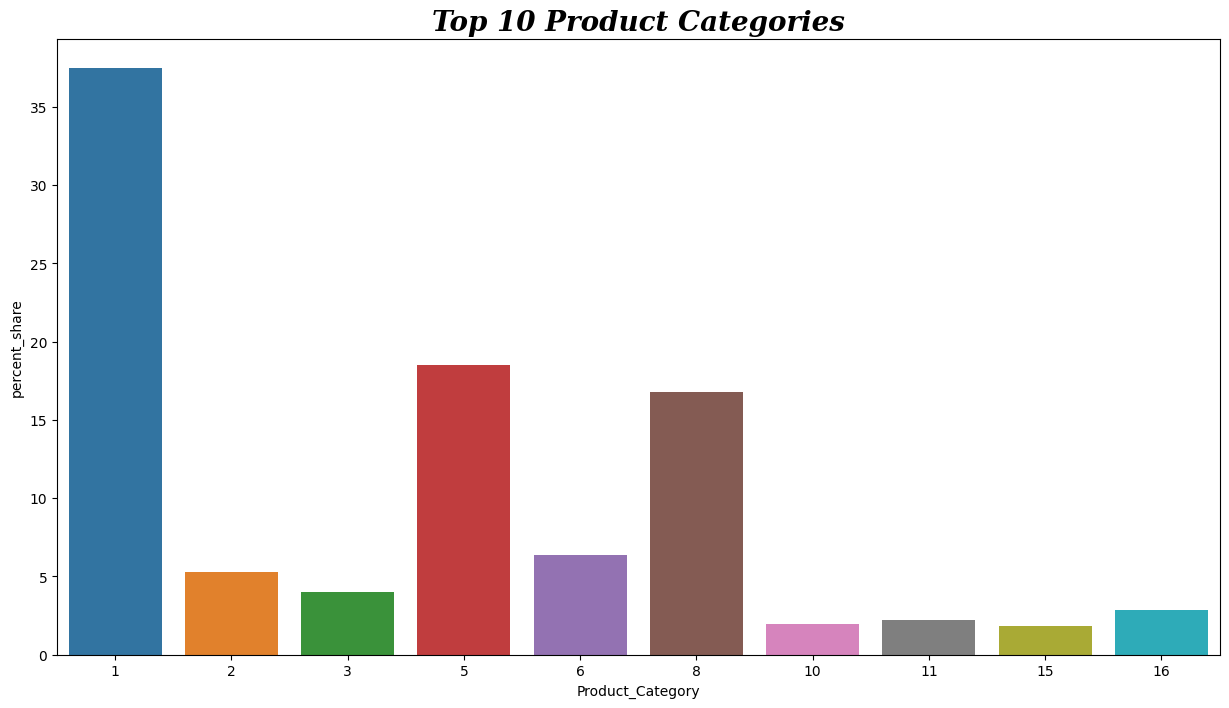

In [70]:
plt.figure(figsize = (15, 8))
plt.title('Top 10 Product Categories', fontsize = 20, fontweight = 600, fontfamily = 'serif', fontstyle = 'oblique')
sns.barplot(data = df, x = product_pur.head(10)['Product_Category'], y = product_pur.head(10)['percent_share'])
plt.show()

In [71]:
#Average amount spend per customer for Male and Female
dfavgamt = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
dfavgamt = dfavgamt.reset_index()
dfavgamt

User_ID Gender  Purchase
0     1000001      F    334093
1     1000002      M    810472
2     1000003      M    341635
3     1000004      M    206468
4     1000005      M    821001
...       ...    ...       ...
5886  1006036      F   4116058
5887  1006037      F   1119538
5888  1006038      F     90034
5889  1006039      F    590319
5890  1006040      M   1653299

[5891 rows x 3 columns]

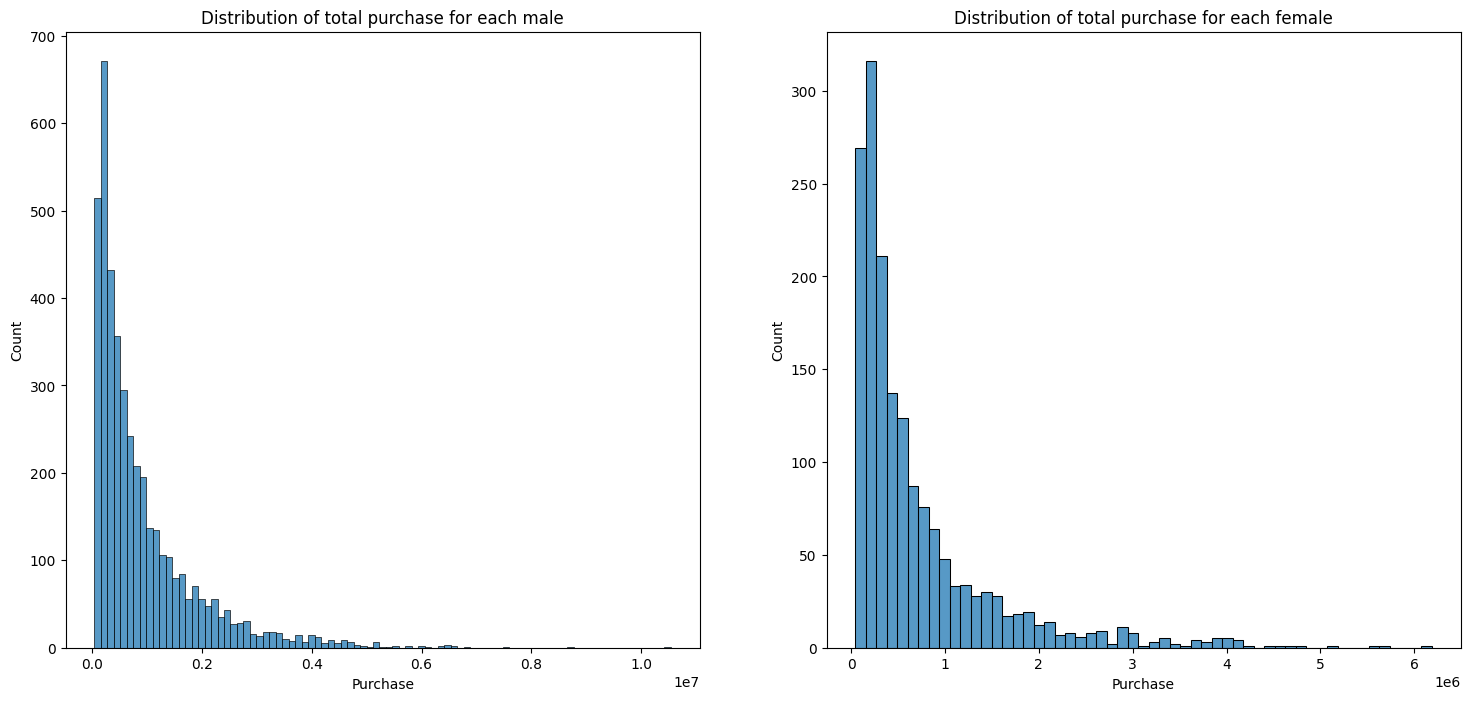

In [72]:
distmale = dfavgamt[dfavgamt['Gender']=='M']
distfemale = dfavgamt[dfavgamt['Gender']=='F']
plt.figure(figsize = (18, 8))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.histplot(data = distmale, x = 'Purchase')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.histplot(data = distfemale, x = 'Purchase')
plt.show()

In [73]:
avgmale = dfavgamt[dfavgamt['Gender']=='M']['Purchase'].mean()
avgfemale = dfavgamt[dfavgamt['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(avgmale))
print("Average amount spend by Female customers: {:.2f}".format(avgfemale))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


* Male customers spend more money than female customers

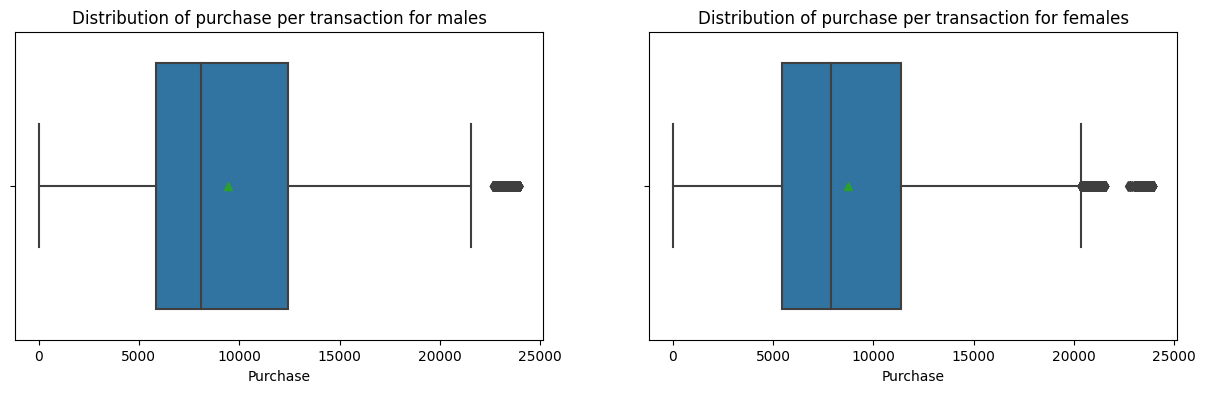

In [74]:
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of purchase per transaction for males')
sns.boxplot(data = df_male, x = 'Purchase', showmeans = True)
plt.subplot(1, 2 ,2)
plt.title('Distribution of purchase per transaction for females')
sns.boxplot(data = df_female, x = 'Purchase', showmeans = True)
plt.show()

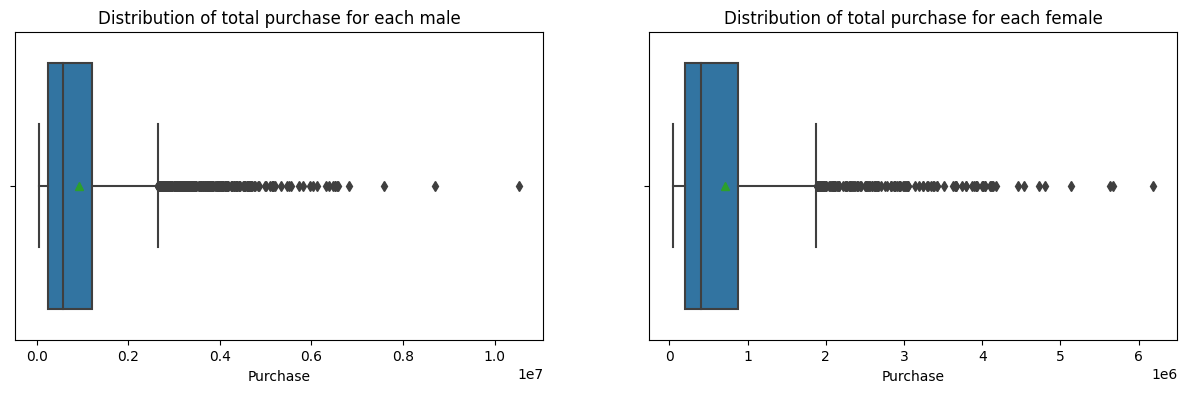

In [75]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.boxplot(data = distmale, x = 'Purchase', showmeans = True)
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.boxplot(data = distfemale, x = 'Purchase', showmeans = True)
plt.show()

In [76]:
dfavgamt

User_ID Gender  Purchase
0     1000001      F    334093
1     1000002      M    810472
2     1000003      M    341635
3     1000004      M    206468
4     1000005      M    821001
...       ...    ...       ...
5886  1006036      F   4116058
5887  1006037      F   1119538
5888  1006038      F     90034
5889  1006039      F    590319
5890  1006040      M   1653299

[5891 rows x 3 columns]

In [77]:
male = dfavgamt[dfavgamt['Gender']=='M']
female = dfavgamt[dfavgamt['Gender']=='F']

In [78]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

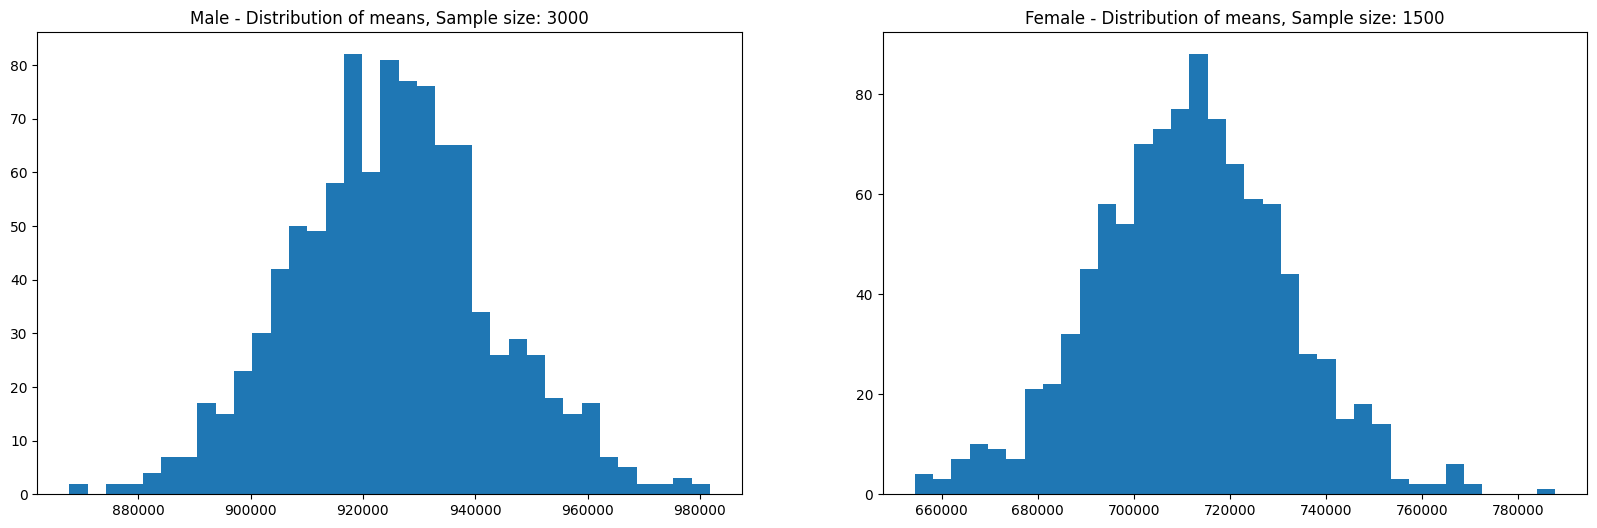

In [79]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [80]:
print("The mean of sample means to determine the average spending amount for Men: {:.2f}".format(np.mean(male_means)))
print("The mean of sample means to determine the average spending amount for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale Sample mean: {:.2f} & Sample std: {:.2f}".format(male['Purchase'].mean(), male['Purchase'].std()))
print("Female Sample mean: {:.2f} & Sample std: {:.2f}".format(female['Purchase'].mean(), female['Purchase'].std()))

The mean of sample means to determine the average spending amount for Men: 925095.19
The mean of sample means to determine the average spending amount for Female: 711752.31

Male Sample mean: 925344.40 & Sample std: 985830.10
Female Sample mean: 712024.39 & Sample std: 807370.73


In [84]:
Male_Margin_of_clt = 1.96*male['Purchase'].std()/np.sqrt(len(male))
male_sample_mean = male['Purchase'].mean()
male_lowlimit = male_sample_mean - Male_Margin_of_clt
male_upplimit = male_sample_mean + Male_Margin_of_clt

Female_Margin_of_clt = 1.96*female['Purchase'].std()/np.sqrt(len(female))
female_sample_mean = female['Purchase'].mean()
female_lowlimit = female_sample_mean - Female_Margin_of_clt
female_upplimit = female_sample_mean + Female_Margin_of_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lowlimit, male_upplimit))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lowlimit, female_upplimit))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


* **Now we can infer about the population that, 95% of the times:**

1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

### Doing the same activity for married vs unmarried

In [85]:
martial_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
martial_df = martial_df.reset_index()
martial_df

User_ID Marital_Status  Purchase
0     1000001         Single    334093
1     1000002         Single    810472
2     1000003         Single    341635
3     1000004        Married    206468
4     1000005        Married    821001
...       ...            ...       ...
5886  1006036        Married   4116058
5887  1006037         Single   1119538
5888  1006038         Single     90034
5889  1006039        Married    590319
5890  1006040         Single   1653299

[5891 rows x 3 columns]

In [86]:
martial_df['Marital_Status'].value_counts()

Single     3417
Married    2474
Name: Marital_Status, dtype: int64

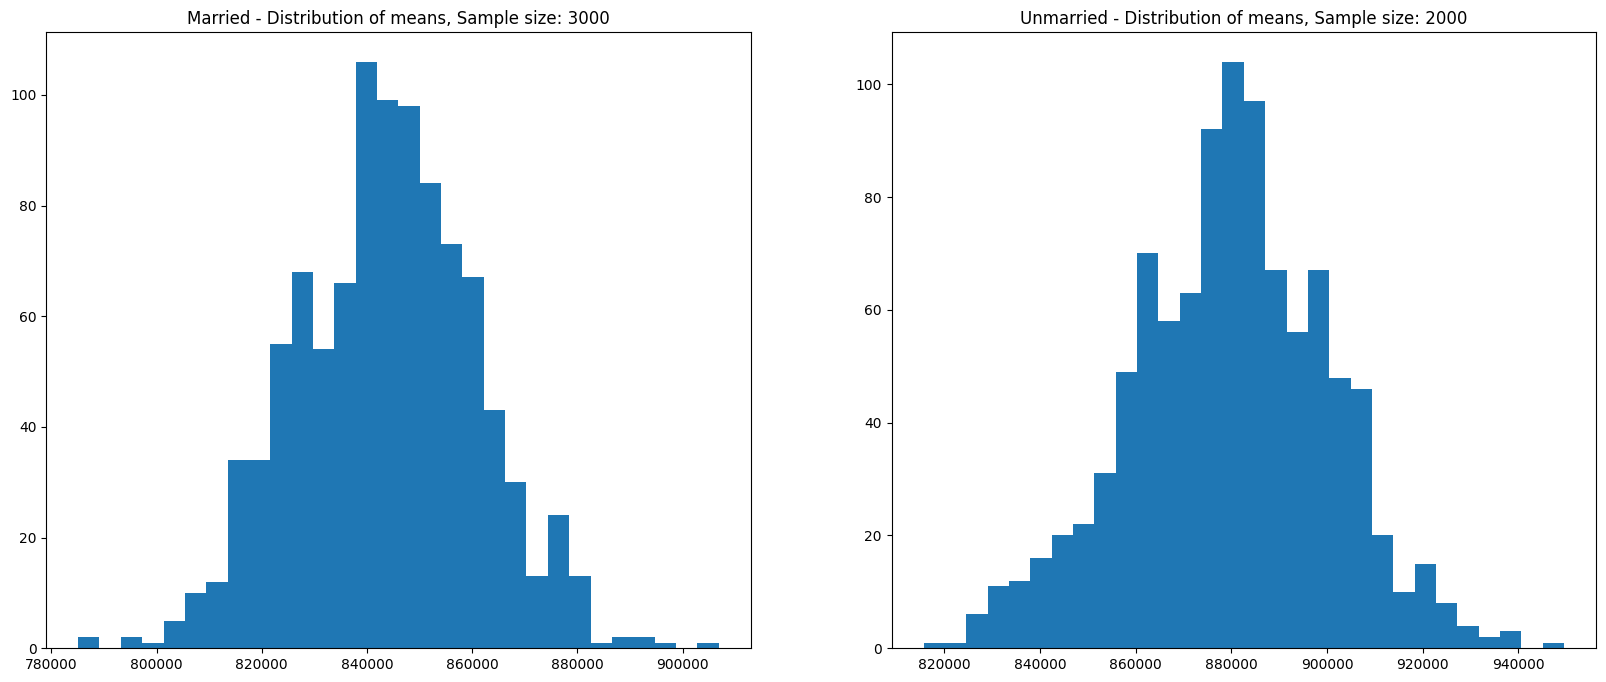

In [87]:
Married_sampsize = 3000
Unmarried_sampsize = 2000
repitions = 1000
Married_mean = []
Unmarried_mean = []

for _ in range(repitions):
    married_mean = martial_df[martial_df['Marital_Status']=='Married'].sample(Married_sampsize, replace=True)['Purchase'].mean()
    unmarried_mean = martial_df[martial_df['Marital_Status']=='Single'].sample(Unmarried_sampsize, replace=True)['Purchase'].mean()
    
    Married_mean.append(married_mean)
    Unmarried_mean.append(unmarried_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axis[0].hist(Married_mean, bins=30)
axis[1].hist(Unmarried_mean, bins=30)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

In [89]:
print("The mean of sample means to determine the average spending amount for Married: {:.2f}".format(np.mean(married_mean)))
print("The mean of sample means to determine the average spending amount for Unmarried: {:.2f}".format(np.mean(unmarried_mean)))

print("\nMarried Sample mean: {:.2f} & Sample std: {:.2f}".format(martial_df[martial_df['Marital_Status']=='Married']['Purchase'].mean(), martial_df[martial_df['Marital_Status']=='Married']['Purchase'].std()))
print("Unmarried Sample mean: {:.2f} & Sample std: {:.2f}".format(martial_df[martial_df['Marital_Status']=='Single']['Purchase'].mean(), martial_df[martial_df['Marital_Status']=='Single']['Purchase'].std()))

The mean of sample means to determine the average spending amount for Married: 853068.65
The mean of sample means to determine the average spending amount for Unmarried: 858598.17

Married Sample mean: 843526.80 & Sample std: 935352.12
Unmarried Sample mean: 880575.78 & Sample std: 949436.25


### Calculating the average amount spent by Age

In [90]:
ageuser = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
ageuser = ageuser.reset_index()
ageuser

User_ID    Age  Purchase
0      1000001   0-17    334093
1      1000001  18-25         0
2      1000001  26-35         0
3      1000001  36-45         0
4      1000001  46-50         0
...        ...    ...       ...
41232  1006040  26-35   1653299
41233  1006040  36-45         0
41234  1006040  46-50         0
41235  1006040  51-55         0
41236  1006040    55+         0

[41237 rows x 3 columns]

In [91]:
ageuser['Age'].value_counts()

0-17     5891
18-25    5891
26-35    5891
36-45    5891
46-50    5891
51-55    5891
55+      5891
Name: Age, dtype: int64

In [92]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    age_df = ageuser[ageuser['Age']==val] 
    
    margin_of_ageclt = 1.96*age_df['Purchase'].std()/np.sqrt(len(age_df))
    sample_mean = age_df['Purchase'].mean()
    low_limit = sample_mean - margin_of_ageclt
    upp_limit = sample_mean + margin_of_ageclt

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, low_limit, upp_limit))

For age 26-35 confidence interval of means: (325226.35, 364561.66)
For age 36-45 confidence interval of means: (159958.40, 188563.04)
For age 18-25 confidence interval of means: (142318.86, 167933.62)
For age 46-50 confidence interval of means: (62258.26, 80618.47)
For age 51-55 confidence interval of means: (54450.95, 70179.72)
For age 55+ confidence interval of means: (28893.83, 39266.89)
For age 0-17 confidence interval of means: (18402.36, 27400.79)


# Summery

- 39.9% of the users are between the age 26-35 (40%: 36-45, 18%: 18-25, 8%: 46-50)
- 75% of the users are Male and 25% are Female
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 different types of occupations in the city
- Product_category 0 represent the largest segment of the gender.
- Product Category 5 has the highest count, representing 27.44% of the total and Product Categories 9 has the lowest counts with 0.07.

<br>

- Most of the users are Male
- There are 20 different types of Occupation and Product_Category
- More users belong to B City_Category
- More users are Single as compare to Married
- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

<br>

* There are 1666 unique female customers and 4225 unique male customers.
* Average number of transactions made by each Male on Black Friday is 98
* Average number of transactions made by each Female on Black Friday is 82
* Out of 5891 unique customers, 42 % of them are Married and 58 % of them are Single.
* Average number of transactions made by each user with marital status Married is 91
* Average number of transactions made by each with marital status Single is 95
* Majority of the transactions are made by the customers whose age is between 26 and 45 years.


<br>

- Average amount spend by Male customers: 925344.40
- Average amount spend by Female customers: 712024.39
- People of age group 26-35 are more active in black friday sale than other age group.
<br>


#### Confidence Interval 
* Now using the **Central Limit Theorem** for the population:
    * Average amount spend by male customers is 9,26,341.86
    * Average amount spend by female customers is 7,11,704.09
<br>
* Now we can infer about the population that, 95% of the times:
    * Average amount spend by male customer will lie in between: (895617.83, 955070.97)
    * Average amount spend by female customer will lie in between: (673254.77, 750794.02)
<br>
* Married confidence interval of means: (806668.83, 880384.76)
* Unmarried confidence interval of means: (848741.18, 912410.38)

* For age 26-35 confidence interval of means: (945034.42,1034284.21)
* For age 36-45 confidence interval of means: (823347.80, 935983.62)
* For age 18-25 confidence interval of means: (801632.78, 908093.46)
* For age 46-50 confidence interval of means: (713505.63, 871591.93)
* For age 51-55 confidence interval of means: (692392.43, 834009.42)
* For age 55+ confidence interval of means: (476948.26, 602446.23)
* For age 0-17 confidence interval of means: (527662.46, 710073.17)

### Recommendations

1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products to expand the product range within those categories. This can attract more customers and increase sales. Additionally, identify complementary products or cross-selling opportunities to encourage customers to make additional purchases.
3. Unmarried people spend more on purchasing through a Walmart, so in order to extend the sales reaching out to married people will be a plus point in terms of sales.
4. Since a majority of transactions are made by customers between the age 26 and 35, it is important to focus marketing efforts on this demographic. Offering products and services that align with their interests and values can maximize revenue generation. making product availability for the other age groups can affect in positive growth of sales in Walmart.
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.
6. Targeting people who are living in city for a long time for shopping by attractive offers.
7. Female can be encouraged for shopping by giving them some discounts so that they may come at par with males.